<a href="https://colab.research.google.com/github/zahrapuspita10/Klasifikasi-Hate-Speech/blob/main/Copy_of_Preprocessing_Fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter

# LOAD DATASET

In [ ]:
data = pd.read_csv('dataset-merge-fix.csv')

data.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1873569711428084014,Mon Dec 30 03:20:03 +0000 2024,4,Dari yang aku tau pemerintah Korea ada program...,1873569711428084014,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/187356971142808...,2410552237,NaN
1,1873253479277543428,Mon Dec 30 02:57:29 +0000 2024,0,@daniputranto @abdurarsyad wah bener2 anjing j...,1873564034135638157,NaN,daniputranto,in,NaN,0,0,0,https://x.com/undefined/status/187356403413563...,1476181318618599424,NaN
2,1873292879298187336,Sun Dec 29 17:25:00 +0000 2024,0,@ARSIPAJA KONTOLLLL gaada yang jelas para peja...,1873419963115184130,NaN,ARSIPAJA,in,NaN,0,0,0,https://x.com/undefined/status/187341996311518...,406648848,NaN
3,1873352052719435965,Sun Dec 29 17:08:40 +0000 2024,0,@convomf setelah BPJS masukin tuh duo koruptor...,1873415852017713641,NaN,convomf,in,NaN,0,0,0,https://x.com/undefined/status/187341585201771...,1798122154413981696,NaN
4,1873405043225055359,Sun Dec 29 16:25:43 +0000 2024,0,Ga pemerintah ga perusahaan sama aja anjing ny...,1873405043225055359,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/187340504322505...,1570274129026383872,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12514 entries, 0 to 12513
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      12514 non-null  int64  
 1   created_at               12514 non-null  object 
 2   favorite_count           12514 non-null  int64  
 3   full_text                12514 non-null  object 
 4   id_str                   12514 non-null  int64  
 5   image_url                1349 non-null   object 
 6   in_reply_to_screen_name  7532 non-null   object 
 7   lang                     12514 non-null  object 
 8   location                 0 non-null      float64
 9   quote_count              12514 non-null  int64  
 10  reply_count              12514 non-null  int64  
 11  retweet_count            12514 non-null  int64  
 12  tweet_url                12514 non-null  object 
 13  user_id_str              12514 non-null  int64  
 14  username              

In [ ]:
# Buat DataFrame dan pilih kolom penting

df = pd.DataFrame(data[["full_text"]])
df.head()

,full_text
0,Dari yang aku tau pemerintah Korea ada program...
1,@daniputranto @abdurarsyad wah bener2 anjing j...
2,@ARSIPAJA KONTOLLLL gaada yang jelas para peja...
3,@convomf setelah BPJS masukin tuh duo koruptor...
4,Ga pemerintah ga perusahaan sama aja anjing ny...


# PROSES HAPUS DATA DUPLIKAT

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12514 entries, 0 to 12513
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  12514 non-null  object
dtypes: object(1)
memory usage: 97.9+ KB


In [ ]:
df.drop_duplicates(subset = "full_text", keep = 'first', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12288 entries, 0 to 12513
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  12288 non-null  object
dtypes: object(1)
memory usage: 192.0+ KB


# WORDCLOUD BEFORE PREPROCESSING

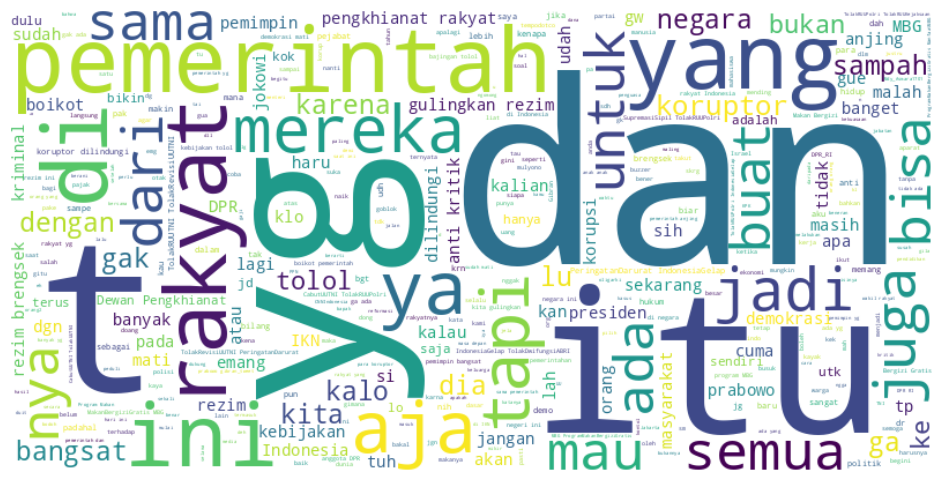

In [ ]:
df['full_text'] = df['full_text'].fillna('')

text = ''.join(df['full_text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400)
wc.generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

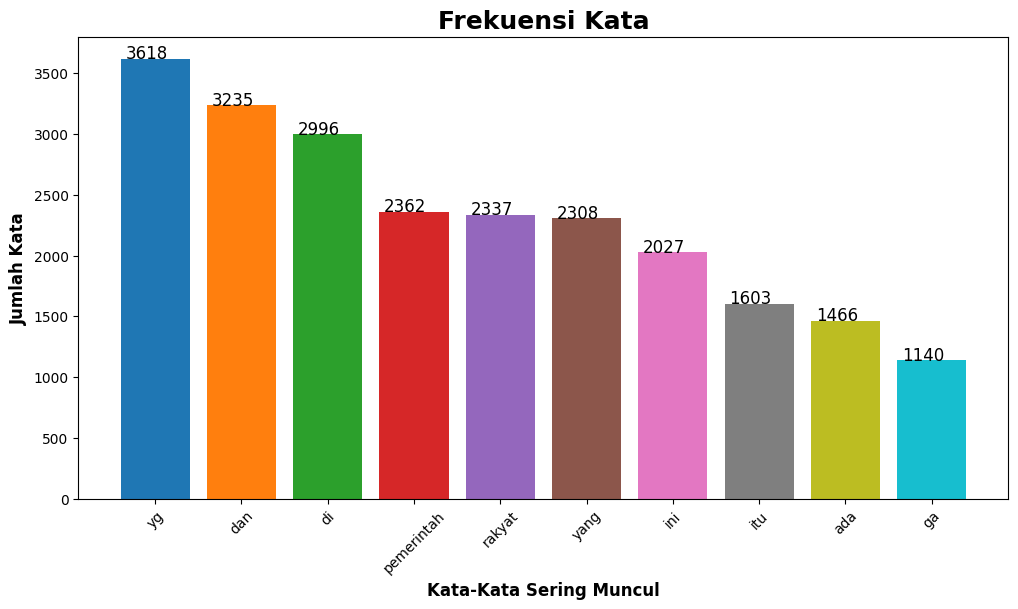

In [ ]:
text = " ".join(df["full_text"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)
word, count = zip(*top_words)
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight= 'bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight= 'bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight= 'bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
  plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color= 'black', ha= 'center')

plt.show()

# PROSES PREPROCESSING

## Cleaning

In [ ]:
import re
import string
import nltk

# Fungsi untuk menghapus URL
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus HTML
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', tweet)
    else:
        return tweet

# Fungsi hapus emoji
def remove_emoji(tweet):
  if tweet is not None and isinstance(tweet, str):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # simbol & piktogram
                               u"\U0001F680-\U0001F6FF"  # simbol transportasi & map
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # geometric shapes extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U0001F004-\U0001F0CF"  # Additional emoticons
                               u"\U0001F1E0-\U0001F1FF"  # flags
                                                  "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)
  else:
    return tweet

# Fungsi hapus simbol
def remove_symbols(tweet):
  if tweet is not None and isinstance(tweet, str):
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet) # Menghapus semua simbol
    return tweet

# Fungsi hapus angka
def remove_numbers(tweet):
  if tweet is not None and isinstance(tweet, str):
    tweet = re.sub(r'\d', '', tweet) # Menghapus semua angka
    return tweet

def remove_username(text):
  import re
  return re.sub(r'@[^\s]+','',text)

# Fungsi untuk menghapus hashtag
def remove_hashtag(tweet):
    if tweet is not None and isinstance(tweet, str):
        hashtag_pattern = re.compile(r'#\S+')
        return hashtag_pattern.sub(r'', tweet)
    else:
        return tweet

df['cleaning'] = df['full_text'].apply(lambda x: remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_username(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_hashtag(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_html(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))

df.head()

,full_text,cleaning
0,Dari yang aku tau pemerintah Korea ada program...,Dari yang aku tau pemerintah Korea ada program...
1,@daniputranto @abdurarsyad wah bener2 anjing j...,wah bener anjing jawir gombong ini ketemu di...
2,@ARSIPAJA KONTOLLLL gaada yang jelas para peja...,KONTOLLLL gaada yang jelas para pejabatpejaba...
3,@convomf setelah BPJS masukin tuh duo koruptor...,setelah BPJS masukin tuh duo koruptor jadi BP...
4,Ga pemerintah ga perusahaan sama aja anjing ny...,Ga pemerintah ga perusahaan sama aja anjing ny...


## Case Folding

In [ ]:
def case_folding(text):
  if isinstance(text, str):
    lowercase_text = text.lower()
    return text.lower()
  else:
    return text

df['case_folding'] = df['cleaning'].apply(case_folding)

df.head()

,full_text,cleaning,case_folding
0,Dari yang aku tau pemerintah Korea ada program...,Dari yang aku tau pemerintah Korea ada program...,dari yang aku tau pemerintah korea ada program...
1,@daniputranto @abdurarsyad wah bener2 anjing j...,wah bener anjing jawir gombong ini ketemu di...,wah bener anjing jawir gombong ini ketemu di...
2,@ARSIPAJA KONTOLLLL gaada yang jelas para peja...,KONTOLLLL gaada yang jelas para pejabatpejaba...,kontollll gaada yang jelas para pejabatpejaba...
3,@convomf setelah BPJS masukin tuh duo koruptor...,setelah BPJS masukin tuh duo koruptor jadi BP...,setelah bpjs masukin tuh duo koruptor jadi bp...
4,Ga pemerintah ga perusahaan sama aja anjing ny...,Ga pemerintah ga perusahaan sama aja anjing ny...,ga pemerintah ga perusahaan sama aja anjing ny...


## Normalization

In [ ]:
# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() or char.isspace() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [ ]:
# Read dataset
data = pd.DataFrame(df[['full_text', 'cleaning', 'case_folding']])
data.head()

,full_text,cleaning,case_folding
0,Dari yang aku tau pemerintah Korea ada program...,Dari yang aku tau pemerintah Korea ada program...,dari yang aku tau pemerintah korea ada program...
1,@daniputranto @abdurarsyad wah bener2 anjing j...,wah bener anjing jawir gombong ini ketemu di...,wah bener anjing jawir gombong ini ketemu di...
2,@ARSIPAJA KONTOLLLL gaada yang jelas para peja...,KONTOLLLL gaada yang jelas para pejabatpejaba...,kontollll gaada yang jelas para pejabatpejaba...
3,@convomf setelah BPJS masukin tuh duo koruptor...,setelah BPJS masukin tuh duo koruptor jadi BP...,setelah bpjs masukin tuh duo koruptor jadi bp...
4,Ga pemerintah ga perusahaan sama aja anjing ny...,Ga pemerintah ga perusahaan sama aja anjing ny...,ga pemerintah ga perusahaan sama aja anjing ny...


In [ ]:
# Baca kamus kata tidak baku
kamus_data = pd.read_excel('kamuskatabaku.xlsx')
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [ ]:
# Fungsi penggantian kata tidak baku
data['normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))

df = pd.DataFrame(data[['full_text', 'cleaning', 'case_folding', 'normalisasi']])

df.head(10)

,full_text,cleaning,case_folding,normalisasi
0,Dari yang aku tau pemerintah Korea ada program...,Dari yang aku tau pemerintah Korea ada program...,dari yang aku tau pemerintah korea ada program...,dari yang aku tau pemerintah korea ada program...
1,@daniputranto @abdurarsyad wah bener2 anjing j...,wah bener anjing jawir gombong ini ketemu di...,wah bener anjing jawir gombong ini ketemu di...,wah benar anjing jawir gombong ini ketemu di s...
2,@ARSIPAJA KONTOLLLL gaada yang jelas para peja...,KONTOLLLL gaada yang jelas para pejabatpejaba...,kontollll gaada yang jelas para pejabatpejaba...,kontol tidak ada yang jelas para pejabatpejaba...
3,@convomf setelah BPJS masukin tuh duo koruptor...,setelah BPJS masukin tuh duo koruptor jadi BP...,setelah bpjs masukin tuh duo koruptor jadi bp...,setelah bpjs memasukkan tuh duo koruptor jadi ...
4,Ga pemerintah ga perusahaan sama aja anjing ny...,Ga pemerintah ga perusahaan sama aja anjing ny...,ga pemerintah ga perusahaan sama aja anjing ny...,tidak pemerintah tidak perusahaan sama saja an...
5,Wkwkw minta rumah di akhirat. Sholat subuh aja...,Wkwkw minta rumah di akhirat Sholat subuh aja ...,wkwkw minta rumah di akhirat sholat subuh aja ...,wkwkw meminta rumah di akhirat salat subuh saj...
6,Emang ANJING PEMERINTAH SIALAN,Emang ANJING PEMERINTAH SIALAN,emang anjing pemerintah sialan,memang anjing pemerintah sialan
7,Dzalim banget pemerintah anjing,Dzalim banget pemerintah anjing,dzalim banget pemerintah anjing,dzalim banget pemerintah anjing
8,selagi pemerintah gak bisa menghilangkan yg na...,selagi pemerintah gak bisa menghilangkan yg na...,selagi pemerintah gak bisa menghilangkan yg na...,selagi pemerintah tidak bisa menghilangkan yan...
9,@shinramyeont @folkshittmedia Anjing got dpn r...,Anjing got dpn rmg yg slh pemerintah,anjing got dpn rmg yg slh pemerintah,anjing got depan rumah yang salah pemerintah


## Tokenization

In [ ]:
def tokenize(text):
  tokens = text.split()
  return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)

df.head(10)

,full_text,cleaning,case_folding,normalisasi,tokenize
0,Dari yang aku tau pemerintah Korea ada program...,Dari yang aku tau pemerintah Korea ada program...,dari yang aku tau pemerintah korea ada program...,dari yang aku tau pemerintah korea ada program...,"[dari, yang, aku, tau, pemerintah, korea, ada,..."
1,@daniputranto @abdurarsyad wah bener2 anjing j...,wah bener anjing jawir gombong ini ketemu di...,wah bener anjing jawir gombong ini ketemu di...,wah benar anjing jawir gombong ini ketemu di s...,"[wah, benar, anjing, jawir, gombong, ini, kete..."
2,@ARSIPAJA KONTOLLLL gaada yang jelas para peja...,KONTOLLLL gaada yang jelas para pejabatpejaba...,kontollll gaada yang jelas para pejabatpejaba...,kontol tidak ada yang jelas para pejabatpejaba...,"[kontol, tidak, ada, yang, jelas, para, pejaba..."
3,@convomf setelah BPJS masukin tuh duo koruptor...,setelah BPJS masukin tuh duo koruptor jadi BP...,setelah bpjs masukin tuh duo koruptor jadi bp...,setelah bpjs memasukkan tuh duo koruptor jadi ...,"[setelah, bpjs, memasukkan, tuh, duo, koruptor..."
4,Ga pemerintah ga perusahaan sama aja anjing ny...,Ga pemerintah ga perusahaan sama aja anjing ny...,ga pemerintah ga perusahaan sama aja anjing ny...,tidak pemerintah tidak perusahaan sama saja an...,"[tidak, pemerintah, tidak, perusahaan, sama, s..."
5,Wkwkw minta rumah di akhirat. Sholat subuh aja...,Wkwkw minta rumah di akhirat Sholat subuh aja ...,wkwkw minta rumah di akhirat sholat subuh aja ...,wkwkw meminta rumah di akhirat salat subuh saj...,"[wkwkw, meminta, rumah, di, akhirat, salat, su..."
6,Emang ANJING PEMERINTAH SIALAN,Emang ANJING PEMERINTAH SIALAN,emang anjing pemerintah sialan,memang anjing pemerintah sialan,"[memang, anjing, pemerintah, sialan]"
7,Dzalim banget pemerintah anjing,Dzalim banget pemerintah anjing,dzalim banget pemerintah anjing,dzalim banget pemerintah anjing,"[dzalim, banget, pemerintah, anjing]"
8,selagi pemerintah gak bisa menghilangkan yg na...,selagi pemerintah gak bisa menghilangkan yg na...,selagi pemerintah gak bisa menghilangkan yg na...,selagi pemerintah tidak bisa menghilangkan yan...,"[selagi, pemerintah, tidak, bisa, menghilangka..."
9,@shinramyeont @folkshittmedia Anjing got dpn r...,Anjing got dpn rmg yg slh pemerintah,anjing got dpn rmg yg slh pemerintah,anjing got depan rumah yang salah pemerintah,"[anjing, got, depan, rumah, yang, salah, pemer..."


## Stopword Removal

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))

df.head()

,full_text,cleaning,case_folding,normalisasi,tokenize,stopword removal
0,Dari yang aku tau pemerintah Korea ada program...,Dari yang aku tau pemerintah Korea ada program...,dari yang aku tau pemerintah korea ada program...,dari yang aku tau pemerintah korea ada program...,"[dari, yang, aku, tau, pemerintah, korea, ada,...","[tau, pemerintah, korea, program, sterilisasi,..."
1,@daniputranto @abdurarsyad wah bener2 anjing j...,wah bener anjing jawir gombong ini ketemu di...,wah bener anjing jawir gombong ini ketemu di...,wah benar anjing jawir gombong ini ketemu di s...,"[wah, benar, anjing, jawir, gombong, ini, kete...","[anjing, jawir, gombong, ketemu, stadion, gue,..."
2,@ARSIPAJA KONTOLLLL gaada yang jelas para peja...,KONTOLLLL gaada yang jelas para pejabatpejaba...,kontollll gaada yang jelas para pejabatpejaba...,kontol tidak ada yang jelas para pejabatpejaba...,"[kontol, tidak, ada, yang, jelas, para, pejaba...","[kontol, pejabatpejabat, pemerintah, loh, anji..."
3,@convomf setelah BPJS masukin tuh duo koruptor...,setelah BPJS masukin tuh duo koruptor jadi BP...,setelah bpjs masukin tuh duo koruptor jadi bp...,setelah bpjs memasukkan tuh duo koruptor jadi ...,"[setelah, bpjs, memasukkan, tuh, duo, koruptor...","[bpjs, memasukkan, tuh, duo, koruptor, bpjs, p..."
4,Ga pemerintah ga perusahaan sama aja anjing ny...,Ga pemerintah ga perusahaan sama aja anjing ny...,ga pemerintah ga perusahaan sama aja anjing ny...,tidak pemerintah tidak perusahaan sama saja an...,"[tidak, pemerintah, tidak, perusahaan, sama, s...","[pemerintah, perusahaan, anjing, ya, rakjel, s..."


## Stemming

In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
  return [stemmer.stem(word) for word in text]

df['stemming'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))

df.head()

,full_text,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming
0,Dari yang aku tau pemerintah Korea ada program...,Dari yang aku tau pemerintah Korea ada program...,dari yang aku tau pemerintah korea ada program...,dari yang aku tau pemerintah korea ada program...,"[dari, yang, aku, tau, pemerintah, korea, ada,...","[tau, pemerintah, korea, program, sterilisasi,...",tau perintah korea program sterilisasi anjing ...
1,@daniputranto @abdurarsyad wah bener2 anjing j...,wah bener anjing jawir gombong ini ketemu di...,wah bener anjing jawir gombong ini ketemu di...,wah benar anjing jawir gombong ini ketemu di s...,"[wah, benar, anjing, jawir, gombong, ini, kete...","[anjing, jawir, gombong, ketemu, stadion, gue,...",anjing jawir gombong ketemu stadion gue gebuki...
2,@ARSIPAJA KONTOLLLL gaada yang jelas para peja...,KONTOLLLL gaada yang jelas para pejabatpejaba...,kontollll gaada yang jelas para pejabatpejaba...,kontol tidak ada yang jelas para pejabatpejaba...,"[kontol, tidak, ada, yang, jelas, para, pejaba...","[kontol, pejabatpejabat, pemerintah, loh, anji...",kontol pejabatpejabat perintah loh anjing biki...
3,@convomf setelah BPJS masukin tuh duo koruptor...,setelah BPJS masukin tuh duo koruptor jadi BP...,setelah bpjs masukin tuh duo koruptor jadi bp...,setelah bpjs memasukkan tuh duo koruptor jadi ...,"[setelah, bpjs, memasukkan, tuh, duo, koruptor...","[bpjs, memasukkan, tuh, duo, koruptor, bpjs, p...",bpjs masuk tuh duo koruptor bpjs pbi gue muak ...
4,Ga pemerintah ga perusahaan sama aja anjing ny...,Ga pemerintah ga perusahaan sama aja anjing ny...,ga pemerintah ga perusahaan sama aja anjing ny...,tidak pemerintah tidak perusahaan sama saja an...,"[tidak, pemerintah, tidak, perusahaan, sama, s...","[pemerintah, perusahaan, anjing, ya, rakjel, s...",perintah usaha anjing ya rakjel sengsara bilan...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12288 entries, 0 to 12513
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   full_text         12288 non-null  object
 1   cleaning          12288 non-null  object
 2   case_folding      12288 non-null  object
 3   normalisasi       12288 non-null  object
 4   tokenize          12288 non-null  object
 5   stopword removal  12288 non-null  object
 6   stemming          12288 non-null  object
dtypes: object(7)
memory usage: 768.0+ KB


# WORDCLOUD AFTER PREPROCESSING

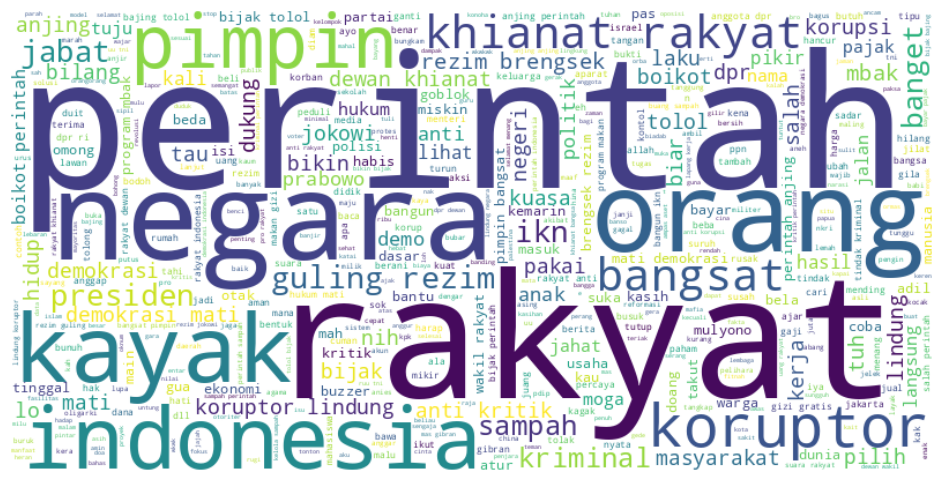

In [ ]:
# Menggabungkan teks dari kolom 'stemming'
text = ' '.join(df['stemming'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'ya', 'gue', 'sih'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400)
wc.generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

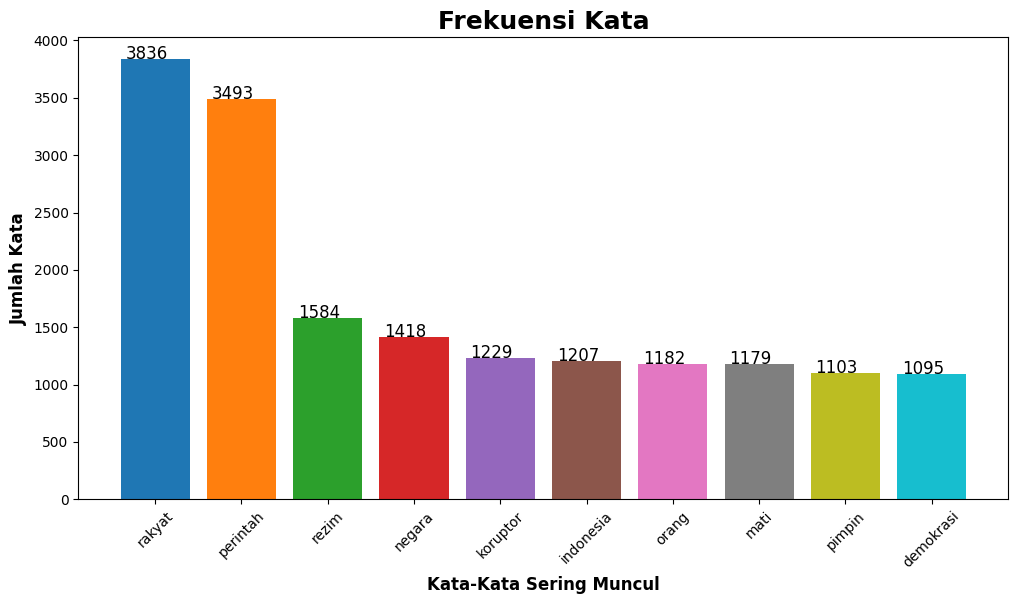

In [ ]:
text = " ".join(df["stemming"])

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'ya', 'gue', 'sih'])

tokens = [word for word in text.split() if word not in stopwords]
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)
word, count = zip(*top_words)
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight= 'bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight= 'bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight= 'bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
  plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color= 'black', ha= 'center')

plt.show()

In [ ]:
df.to_csv('Hasil_Preprocessing_Data.csv',encoding='utf8', index=False)